In [1]:
from tensorflow.keras.models import load_model
import io
import requests
import pickle
import numpy as np

In [2]:
# Load model nya
model = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/sentiment_model.keras"
model_file = io.BytesIO(requests.get(model).content)
with open("/tmp/sentiment_model.h5", "wb") as f:
    f.write(model_file.getbuffer())

tfidf_url = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/tfidf_vectorizer.pkl"
tfidf_file = io.BytesIO(requests.get(tfidf_url).content)
with open("/tmp/tfidf_vectorizer.pkl", "wb") as f:
    f.write(tfidf_file.getbuffer())
with open("/tmp/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)


label_url = "https://raw.githubusercontent.com/ejapten/Analisis-Sentimen-Game-Getrich/main/deploy/label_encoder.pkl"
label_file = io.BytesIO(requests.get(label_url).content)
with open("/tmp/label_encoder.pkl", "wb") as f:
    f.write(label_file.getbuffer())
with open("/tmp/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

In [3]:
model = load_model("/tmp/sentiment_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# buat fungsi untuk prediksi deploynya
def predict_sentiment(text):
    text_vectorized = tfidf.transform([text]).toarray()
    prediction = model.predict(text_vectorized)
    label_index = np.argmax(prediction)
    label = le[label_index]

    return label


In [15]:
# input
user_input = input("Masukkan teks ulasan: ")

#prediksi
predicted_label = predict_sentiment(user_input)

# output
print("\n=== Hasil Prediksi ===")
print(f"Teks: {user_input}")
print(f"Label Prediksi: {predicted_label}")

Masukkan teks ulasan: i dont know getrich
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

=== Hasil Prediksi ===
Teks: i dont know getrich
Label Prediksi: neutral


In [ ]:
# Negative

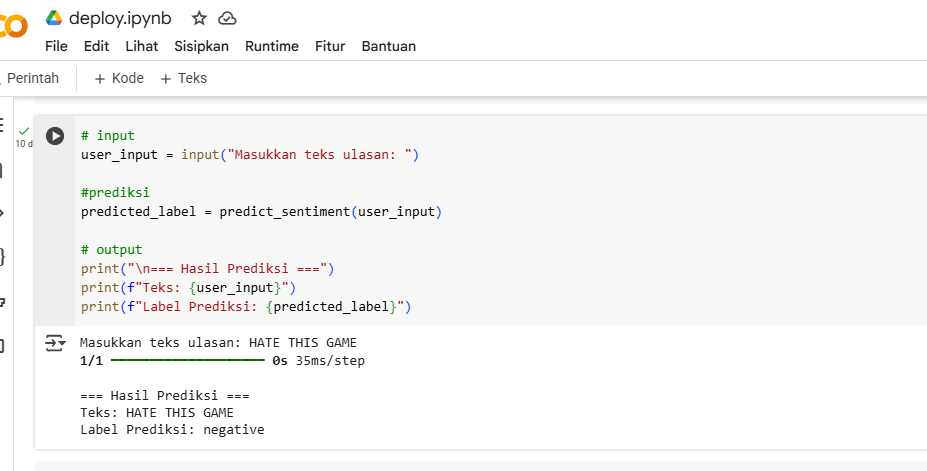

In [ ]:
# Positive

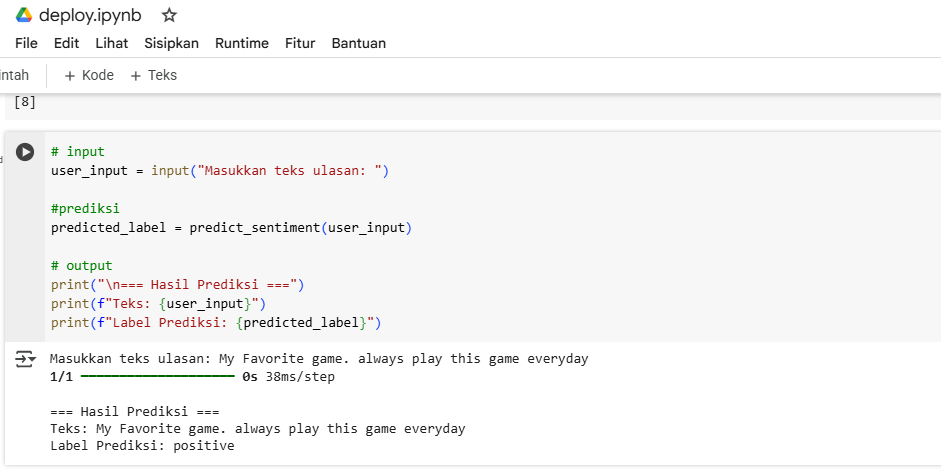

In [16]:
# Neutral

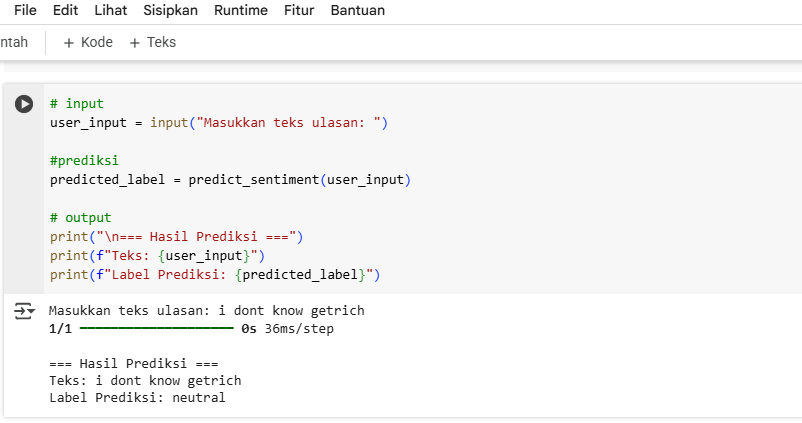